In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
#import sp.sparse as sp

In [14]:
N = 8
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

In [15]:
def L(n,x):
    if n == 0:
        return 1
    elif n == 1:
        return x
    else:
        return ((2*n-1)*x*L(n-1,x) - (n-1)*L(n-2,x))/float(n)

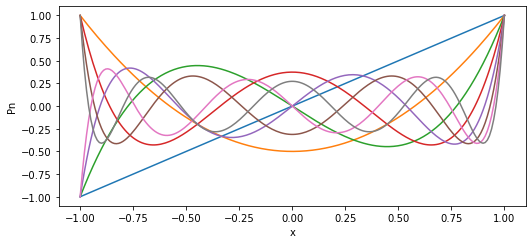

In [16]:
x = np.linspace(-1,1,200)
for i in range(1,N+1):
    plt.plot(x,L(i,x),label = f"L({i},x)")
plt.xlabel("x")
plt.ylabel("Pn")
plt.show()

In [ ]:
""" L = []
for i in range(0,N+1):
    if i == 0:
        f = lambda x:1
        L.append(f)
    elif i == 1:
        f = lambda x:x
        L.append(f)
    else:
        f = lambda x : ((2*i-1)*x*L[i-1](x) - (i-1)*L[i-2](x))/float(i)
        L.append(f) """

In [17]:
def L1(n,x):
    return ((n*(n+1)/float((2*n+1)))*(L(n-1,x)-L(n+1,x))/(1-x**2))

<ipython-input-17-838d585156b9>:2: RuntimeWarning: invalid value encountered in true_divide
  return ((n*(n+1)/float((2*n+1)))*(L(n-1,x)-L(n+1,x))/(1-x**2))
<ipython-input-17-838d585156b9>:2: RuntimeWarning: invalid value encountered in true_divide
  return ((n*(n+1)/float((2*n+1)))*(L(n-1,x)-L(n+1,x))/(1-x**2))
<ipython-input-17-838d585156b9>:2: RuntimeWarning: invalid value encountered in true_divide
  return ((n*(n+1)/float((2*n+1)))*(L(n-1,x)-L(n+1,x))/(1-x**2))
<ipython-input-17-838d585156b9>:2: RuntimeWarning: invalid value encountered in true_divide
  return ((n*(n+1)/float((2*n+1)))*(L(n-1,x)-L(n+1,x))/(1-x**2))
<ipython-input-17-838d585156b9>:2: RuntimeWarning: invalid value encountered in true_divide
  return ((n*(n+1)/float((2*n+1)))*(L(n-1,x)-L(n+1,x))/(1-x**2))
<ipython-input-17-838d585156b9>:2: RuntimeWarning: invalid value encountered in true_divide
  return ((n*(n+1)/float((2*n+1)))*(L(n-1,x)-L(n+1,x))/(1-x**2))
<ipython-input-17-838d585156b9>:2: RuntimeWarning: invalid

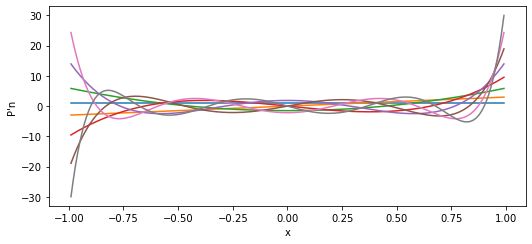

In [18]:
x = np.linspace(-1,1,200)
for i in range(1,N+1):
    plt.plot(x,L1(i,x),label = f"L'({i},x)")
plt.xlabel("x")
plt.ylabel("P'n")
plt.show()

In [19]:
def tridiag(a, b, c, k1=-1, k2=0, k3=1):
    return np.diag(a, k1) + np.diag(b, k2) + np.diag(c, k3)

In [20]:
#zeroes of L_N+1
def LG(n):
    a = [0 for i in range(0,n+1)]
    b = [math.sqrt((j**2)/(4*(j**2)-1)) for j in range(1,n+1)]
    A = tridiag(b,a,b)
    w,v = LA.eig(A)
    w = sorted(w,reverse=False)
    return w

In [22]:
#zeroes of L_N + L_N+1
def LGR(n):
    a = [1/float(((2*j+1)*(2*j+3))) for j in range(0,n)]
    b = [math.sqrt(((j+1)*j)/((2*j+1)**2)) for j in range(1,n)]
    A = tridiag(b,a,b)
    w,v = LA.eig(A)
    w = np.append(w,-1)
    w = sorted(w,reverse=False)
    return w
#""" print(LGR(5))
#out = [L(N,x)+L(N+1,x) for x in LGR(N)]
#print(out) """

In [23]:
#zeroes of (1-x^2)L'_N
def LGL(n):
    a = [0 for i in range(0,n-1)]
    b = [math.sqrt(j*(j+2)/((2*j+1)*(2*j+3))) for j in range(1,n-1)]
    A = tridiag(b,a,b)
    w,v = LA.eig(A)
    new = np.append(w,[1,-1])
    new = sorted(new,reverse=False)
    return new
#""" print(LGL(5))
#out = [L1(5,x) for x in LGL(5)]
#print(out) """

In [24]:
#LG nodes using Newton's method
eps = 1e-10
#initial approx
def LGx(N):
    thet_k = [(4*k-1)*math.pi/(4*N+2) for k in range(1,N+1)]
    init_k = [(1 - ((N-1)/(8*(N**3)))-((39-(28/(math.sin(thet_k[k]))**2))/(384*((N)**4))))*math.cos(thet_k[k]) for k in range(0,N)]
    for i in range(0,N):
        D = L(N,init_k[i])/L1(N,init_k[i])
        while (L(N,init_k[i])>eps):
            init_k[i] -= D
            D = L(N,init_k[i])/L1(N,init_k[i])
    return init_k

In [26]:
#LGL nodes using Newtons's method
def D(N,x):
    return (((1-(x**2))*L1(N,x))/((2*x*L1(N,x))-(N*(N+1)*L(N,x))))
def LGLx(N):
    thet_k = [(4*k-1)*math.pi/(4*N+2) for k in range(1,N+1)]
    init_kx = [(1 - ((N-1)/(8*(N**3)))-((39-(28/(math.sin(thet_k[k]))**2))/(384*((N)**4))))*math.cos(thet_k[k]) for k in range(0,N)]
    init_k = [(init_kx[j]+init_kx[j+1])/2 for j in range(0,N-1)]
    for i in range(0,N-1):
        while L1(N,init_k[i])>eps:
            init_k[i] -= D(N,init_k[i])
            #print("eh")
    new = np.append(init_k,[1,-1])
    return new
#""" print(LGLx(5))
#out = [L1(5,x) for x in LGLx(5)]
#print(out) """
#there seems to be some issue

In [27]:
#Quadrature weights using LG nodes
def wlg(N):
    wlg = [2/((1-(x**2))*(L1(N+1,x)**2)) for x in LG(N)]
    return wlg
#Quadrature weights using LGR nodes
def wlgr(N):
    wlgr = [(1-x)/(((N+1)**2)*(L(N,x)**2)) for x in LGR(N)]
    return wlgr
#Quadrature weights using LGL nodes
def wlgl(N):
    wlgl = [2/(N*(N+1)*(L(N,x)**2)) for x in LGL(N)]
    return wlgl
#wlgl(5)

In [28]:
#discrete inner products
def inner_product_LG(u,v,N):
    wlgx = wlg(N)
    nodes = LG(N)
    sum = 0
    i = 0
    for x in nodes:
        sum += u(x)*v(x)*wlgx[i]
        i +=1
    return sum
def inner_product_LGR(u,v,N):
    wlgrx = wlgr(N)
    nodes = LGR(N)
    sum = 0
    i = 0
    for x in nodes:
        sum += u(x)*v(x)*wlgrx[i]
        i +=1
    return sum 
def inner_product_LGL(u,v,N):
    wlglx = wlgl(N)
    nodes = LGL(N)
    sum = 0
    i = 0
    for x in nodes:
        sum += u(x)*v(x)*wlglx[i]
        i +=1
    return sum
#example
def u(x):
    return x**7
def v(x):
    return x**5
print(inner_product_LGR(u,v,6)) # 2/13


0.15384615384616424


In [30]:
#precomputing Ln(xj) matrice
def precomp(N):
    a = []
    nodes = LG(N)
    for n in range(0,N+1):
        a.append([L(n,x) for x in nodes])
    return a

In [31]:
def fwd_legendre_transform(u,N):
    #temp = [(inner_product_LG(u,L(n),N))/(inner_product_LG(L(n),L(n),N)) for n in range(0,N+1)] #can't use inner_product_LG
    utilda = []
    nodes = LG(N)
    mat = precomp(N)
    w = wlg(N)
    for n in range(0,N+1):
        sum = 0
        for j in range(0,N+1):
            sum += u(nodes[j])*mat[n][j]*w[j]
        sum = (sum*(2*n+1))/2
        utilda.append(sum)
    return utilda
#Lagrange interpolant
def Ip(u,N,x):
    sum = 0
    utilda = fwd_legendre_transform(u,N)
    for n in range(0,N+1):
        sum += utilda[n]*L(n,x)
    return sum
def bck_legendre_transform(utilda,N):
    u = []
    nodes = LG(N)
    #utilda = fwd_legendre_transform(u,N)
    for x in nodes:
        temp = 0
        for n in range(0,N+1):
            temp += utilda[n]*L(n,x)
        u.append(temp)
    return u
def f(x):
    return (x**7 + 3*x**4 -3) #math.sin(2*(math.pi)*x)
#print([f(x) for x in LG(5)])
#""" eh = fwd_legendre_transform(f,5)
##print(eh)
#print(bck_legendre_transform(eh,5))
#print(f(2))
#print(Ip(f,5,2)) """

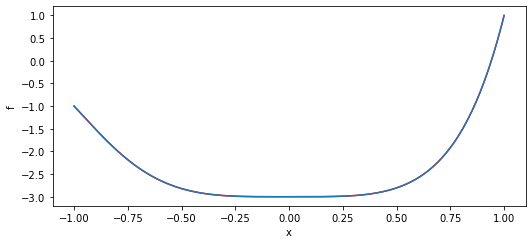

In [32]:
x = np.linspace(-1,1,200)
plt.plot(x,f(x),c='r')
plt.plot(x,Ip(f,7,x))
plt.xlabel("x")
plt.ylabel("f")
plt.show()
#completely coincides

In [33]:
#Differentiation matrices
def D_LG(N):
    nodes = LG(N)
    #nodes = sorted(nodes,reverse=False)
    out = np.empty([N+1,N+1],dtype=float)
    for k in range(0,N+1):
        for j in range(0,N+1):
            if (k==j):
                out[k][j] = (nodes[k])/(1-((nodes[k])**2))
            else:
                out[k][j] = (L1(N+1,nodes[k]))/(L1(N+1,nodes[j])*(nodes[k]-nodes[j]))
    return out
def D_LGL(N):
    nodes = LGL(N)
    #nodes = sorted(nodes,reverse=False)
    out = np.empty([N+1,N+1],dtype=float)
    for k in range(0,N+1):
        for j in range(0,N+1):
            if (k==j):
                if (k==0):
                    out[k][j] = (-1*(N*(N+1)))/4
                elif (k==N):
                    out[k][j] = ((N*(N+1)))/4
                else:
                    out[k][j] = 0
            else:
                out[k][j] = (L(N+1,nodes[k]))/(L(N+1,nodes[j])*(nodes[k]-nodes[j]))
    return out
def D_LGR(N):
    nodes = LGR(N)
    #nodes = sorted(nodes,reverse=False)
    out = np.empty([N+1,N+1],dtype=float)
    for k in range(0,N+1):
        for j in range(0,N+1):
            if (k==j):
                if (k==0):
                    out[k][j] = (-1*(N*(N+2)))/4
                else:
                    out[k][j] = ((nodes[k])/(1-((nodes[k])**2))) + (((N+1)*L(N,nodes[k]))/((1-(nodes[k]**2))*(L1(N,nodes[k])+L1(N+1,nodes[k]))))
            else:
                out[k][j] = (L1(N+1,nodes[k])+L1(N,nodes[k]))/((L1(N+1,nodes[j])+L1(N,nodes[j]))*(nodes[k]-nodes[j]))
    return out

In [34]:
def Diff_coeff(u,N,m):
    nodes = LG(N)
    #nodes = sorted(nodes,reverse=False)
    D = D_LG(N)
    vec = np.array([u(x) for x in nodes])
    D = np.linalg.matrix_power(D,m)
    return D.dot(vec)
def Diff(u,N,m,x):
    eh = Diff_coeff(u,N,m)
    utilda = []
    mat = precomp(N)
    w = wlg(N)
    for n in range(0,N+1):
        sum = 0
        for j in range(0,N+1):
            sum += eh[j]*mat[n][j]*w[j]
        sum = (sum*(2*n+1))/2
        utilda.append(sum)
    sum = 0
    for j in range(0,N+1):
        sum += utilda[j]*L(j,x)
    return sum
#print(f(1))
#print(Diff(f,5,1,1))
#print(Diff_coeff(f,5,1))

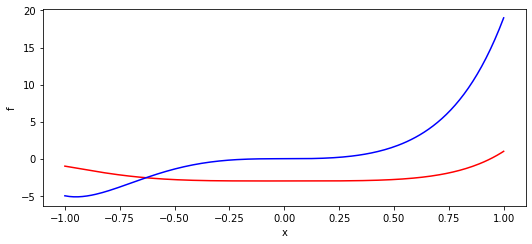

In [35]:
x = np.linspace(-1,1,200)
plt.plot(x,f(x),c='r')
plt.plot(x,Diff(f,7,1,x),c='b')
plt.xlabel("x")
plt.ylabel("f")
plt.show()

In [36]:
#differentiation in frequency space
def u_diff(utilda,N):
    out = np.zeros(N+1)
    out[N-1] = (2*N-1)*utilda[N]
    for k in range(N-1,0,-1):
        out[k-1] = (2*k-1)*(utilda[k]+((out[k+1])/(2*k+3)))
    return out
def Diff2(u,N,m,x):
    utilda = fwd_legendre_transform(u,N)
    for _ in range(0,m):
        utilda = u_diff(utilda,N)
    sum = 0
    for n in range(0,N+1):
        sum += utilda[n]*L(n,x)
    return sum
#""" print(f(2))
#print(Diff2(f,5,1,2)) """

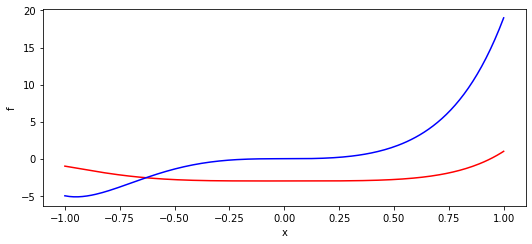

In [37]:
x = np.linspace(-1,1,200)
plt.plot(x,f(x),c='r')
plt.plot(x,Diff2(f,7,1,x),c='b')
plt.xlabel("x")
plt.ylabel("f")
plt.show()

In [ ]:
""" def Ip(u,N):
    eh = u
    utilda = []
    mat = precomp(N)
    w = wlg(N)
    for n in range(0,N+1):
        sum = 0
        for j in range(0,N+1):
            sum += eh[j]*mat[n][j]*w[j]
        sum = (sum*(2*n+1))/2
        utilda.append(sum)
    sum = 0
    for j in range(0,N+1):
        sum += utilda[j]*L(j,x)
    return sum """